# Elliptic PDE's

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [44]:
N = 100
V = np.zeros((2,N,N))
V

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [45]:
V[0,0] = np.ones(N)
V[1,0] = np.ones(N)
V

array([[[1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [46]:
V[1,1,1] = (V[0,0,1] + V[0,2,1] + V[0,1,0] + V[0,1,2])/4
V[1,1,1] = (V[0,0,1] + V[0,2,1] + V[0,1,0] + V[0,1,2])/4
V[1,1,2] = (V[0,0,2] + V[0,2,2] + V[0,1,1] + V[0,1,3])/4

In [34]:
for k in range(10000):
    for i in range(1,N-1):
        for j in range(1,N-1):
            V[k%2,i,j] = (V[(k+1)%2, i-1, j] + V[(k+1)%2, i+1, j] + V[(k+1)%2, i, j-1] + V[(k+1)%2, i, j+1])/4

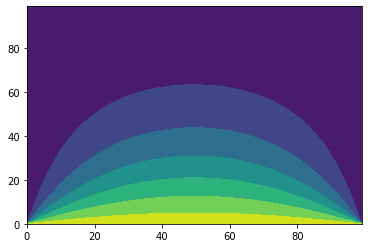

In [35]:
plt.contourf(V[1])

In [38]:
for i in range(10000):
    V[0] = V[1]
    V[1,1:-1,1:-1] = (V[0,0:-2,1:-1] + V[0,1:-1,2:] + V[0,1:-1,0:-2] + V[0,2:,1:-1])/4  

V

array([[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 4.99888342e-01, 6.97429340e-01, ...,
         6.97429340e-01, 4.99888342e-01, 0.00000000e+00],
        [0.00000000e+00, 3.02124028e-01, 4.99553368e-01, ...,
         4.99553368e-01, 3.02124028e-01, 0.00000000e+00],
        ...,
        [0.00000000e+00, 2.23433217e-04, 4.46631262e-04, ...,
         4.46631262e-04, 2.23433217e-04, 0.00000000e+00],
        [0.00000000e+00, 1.11657857e-04, 2.23198210e-04, ...,
         2.23198210e-04, 1.11657857e-04, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 4.99888342e-01, 6.97429340e-01, ...,
         6.97429340e-01, 4.99888342e-01, 0.00000000e+00],
        [0.00000000e+00, 

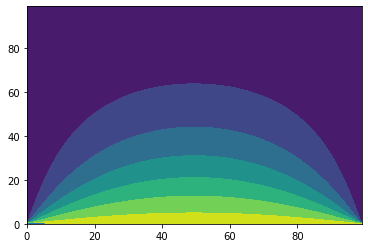

In [39]:
plt.contourf(V[1])
plt.plot(x, (V[1,80]))

In [47]:
def initPotential(N=100):
    V = np.zeros((2,N,N))

    V[0,0] = np.ones(N)
    V[1,0] = np.ones(N)

    dst = 1
    src = 0
    
    return V, dst, src

In [48]:
def calcError(V):
    return np.sqrt(((V[1] - V[0])**2).sum()/(N**2))


def doCalculation(V, dst, src, minError = 1e-6):
    error = 1
    count = 0
    while error > minError:
        mat1 = V[src, :-2, 1:-1]  # purple
        mat2 = V[src, 2:, 1:-1]   # yellow
        mat3 = V[src, 1:-1, :-2]  # red
        mat4 = V[src, 1:-1, 2:]   # blue
        V[dst,1:-1,1:-1] = (mat1 + mat2 + mat3 + mat4)/4
        dst = 1 - dst
        src = 1 - src
        error = calcError(V)
        count += 1
        if (count % 1000) == 0:
            print("Counting..", count, "error: ", error)
            
    return count, error, V

In [49]:
#def doBoth(N=100):
 #   V, dst, src = initPotential(100)
  #  count, error, V = doCalculation(V, dst, src, minError=1e-4)
    
#%timeit doBoth()

In [50]:
count, error, V = doCalculation(V, 1, 0, minError=1e-10)
print(count)

Counting.. 1000 error:  8.754767552447384e-05
Counting.. 2000 error:  4.038731866263066e-05
Counting.. 3000 error:  2.277786806540147e-05
Counting.. 4000 error:  1.3542807827401835e-05
Counting.. 5000 error:  8.154710674389785e-06
Counting.. 6000 error:  4.924372356551765e-06
Counting.. 7000 error:  2.975560816052434e-06
Counting.. 8000 error:  1.7982400445496382e-06
Counting.. 9000 error:  1.0867757429971941e-06
Counting.. 10000 error:  6.568030687828957e-07
Counting.. 11000 error:  3.9694566596808694e-07
Counting.. 12000 error:  2.398982611322283e-07
Counting.. 13000 error:  1.4498503157883522e-07
Counting.. 14000 error:  8.762322670753664e-08
Counting.. 15000 error:  5.2956017613952175e-08
Counting.. 16000 error:  3.200452561664222e-08
Counting.. 17000 error:  1.9342271308599936e-08
Counting.. 18000 error:  1.1689704883238638e-08
Counting.. 19000 error:  7.064795963431981e-09
Counting.. 20000 error:  4.2696836665963024e-09
Counting.. 21000 error:  2.5804281824433746e-09
Counting.. 2

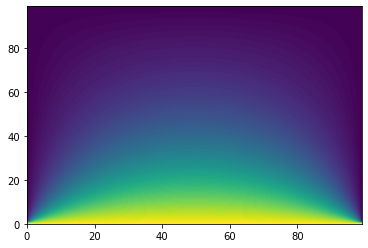

In [51]:
plt.contourf(V[1],100)

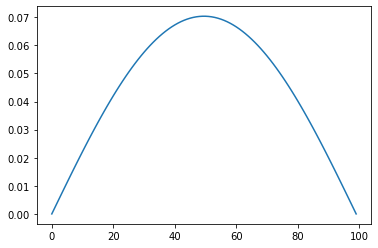

In [52]:
plt.plot(V[1, 80])

In [53]:
L = 5
x = np.linspace(0, L, N)
dx = x[1] - x[0]
y = np.where((x < L) & (x > 0), 1, 0)

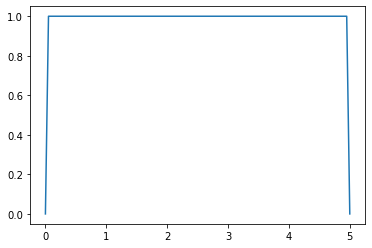

In [54]:
plt.plot(x, y)

In [55]:
def fa_vec(x):
    
    return np.where((x < L) & (x > 0), 1, 0)

def basis(x, n):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

In [56]:
def simpson_array(f, h):
    """

Use Simpson's Rule to estimate an integral of an array of
    function samples
    
    f: function samples (already in an array format)
    h: spacing in "x" between sample points
    
    The array is assumed to have an even number of elements.
    
    """
    if len(f)%2 != 0:
        raise ValueError("Sorry, f must be an array with an even number of elements.")
        
    evens =  f[2:-2:2]
    odds = f[1:-1:2]
    return (f[0] + f[-1] + 2*odds.sum() + 4*evens.sum())*dx/3.0

In [57]:
def braket(n):
    """
    Evaluate <n|f>
    """
    return simpson_array(basis(x,n)*fa_vec(x),dx)

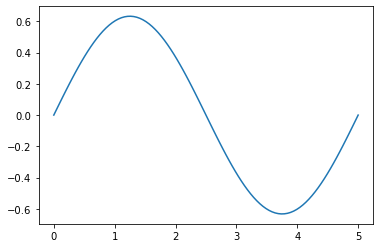

In [58]:
plt.plot(x, basis(x,2))

         n	      coef
       ---	     -----
         1	   2.01165
         2	   0.00236
         3	   0.66650
         4	   0.00471
         5	   0.39506
         6	   0.00704
         7	   0.27703
         8	   0.00934
         9	   0.21016
        10	   0.01159
        11	   0.16659
        12	   0.01378
        13	   0.13558
        14	   0.01590
        15	   0.11215
        16	   0.01794
        17	   0.09366
        18	   0.01990
        19	   0.07858


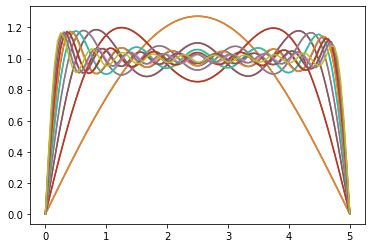

In [59]:
M=20
coefs = [0]
coefs_th = [0]
ys = [[]]
sup = np.zeros(N)
for n in range(1,M):
    coefs.append(braket(n))   # do numerical integral

    if n%2==0:
        coefs_th.append(0.0)
        
    ys.append(coefs[n]*basis(x,n))
    sup += ys[n]
    plt.plot(x,sup)

print("%10s\t%10s" % ('n', 'coef'))
print("%10s\t%10s" % ('---','-----'))

for n in range(1,M):
    print("%10d\t%10.5f" % (n, coefs[n]))

In [60]:
M = []
i = 1
while i < 20:
    A = np.array([[1, 1], [np.exp(-(i*np.pi/L)*L), (np.exp((i*np.pi/L)*L))]])
    b = np.array([1, 0])
    x = np.linalg.solve(A, b)
    M.append(x)
    i = i +1
M

[array([ 1.00187094, -0.00187094]),
 array([ 1.00000349e+00, -3.48735452e-06]),
 array([ 1.00000001e+00, -6.51241218e-09]),
 array([ 1.00000000e+00, -1.21615567e-11]),
 array([ 1.00000000e+00, -2.27110107e-14]),
 array([ 1.00000000e+00, -4.24115118e-17]),
 array([ 1.00000000e+00, -7.92010695e-20]),
 array([ 1.00000000e+00, -1.47903462e-22]),
 array([ 1.00000000e+00, -2.76201244e-25]),
 array([ 1.00000000e+00, -5.15790006e-28]),
 array([ 1.00000000e+00, -9.63208298e-31]),
 array([ 1.00000000e+00, -1.79873634e-33]),
 array([ 1.0000000e+00, -3.3590371e-36]),
 array([ 1.00000000e+00, -6.27280941e-39]),
 array([ 1.00000000e+00, -1.17141123e-41]),
 array([ 1.0000000e+00, -2.1875434e-44]),
 array([ 1.00000000e+00, -4.08511201e-47]),
 array([ 1.00000000e+00, -7.62871274e-50]),
 array([ 1.00000000e+00, -1.42461842e-52])]

In [61]:
M = np.array(M)
M

array([[ 1.00187094e+00, -1.87093660e-03],
       [ 1.00000349e+00, -3.48735452e-06],
       [ 1.00000001e+00, -6.51241218e-09],
       [ 1.00000000e+00, -1.21615567e-11],
       [ 1.00000000e+00, -2.27110107e-14],
       [ 1.00000000e+00, -4.24115118e-17],
       [ 1.00000000e+00, -7.92010695e-20],
       [ 1.00000000e+00, -1.47903462e-22],
       [ 1.00000000e+00, -2.76201244e-25],
       [ 1.00000000e+00, -5.15790006e-28],
       [ 1.00000000e+00, -9.63208298e-31],
       [ 1.00000000e+00, -1.79873634e-33],
       [ 1.00000000e+00, -3.35903710e-36],
       [ 1.00000000e+00, -6.27280941e-39],
       [ 1.00000000e+00, -1.17141123e-41],
       [ 1.00000000e+00, -2.18754340e-44],
       [ 1.00000000e+00, -4.08511201e-47],
       [ 1.00000000e+00, -7.62871274e-50],
       [ 1.00000000e+00, -1.42461842e-52]])

In [62]:
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)

k = np.pi/L

X,Y = np.meshgrid(x, y)
V = np.zeros([N, N])

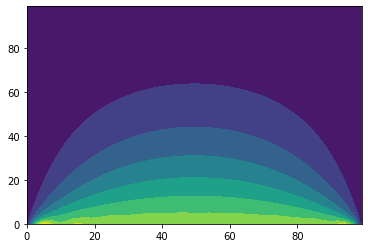

In [63]:
for n in range (1, 20):
    V = V + (coefs[n] * np.sqrt(2/L)*np.sin(n*k*X) * (M[n-1, 0] * np.exp(-k * n * Y) + M[n-1, 1] * np.exp(k * n * Y)))
V
plt.contourf(V)

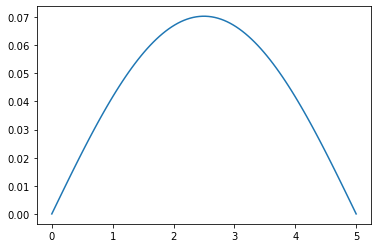

In [64]:
plt.plot(x, V[80])